Working on Covid19 dataset
Total Number of Observations: 23688

Description Below:

Date 
Country: Total 118 Countries
Confirmed:23688 Enteries
Recovered:23688 Enteries
Deaths:23688 Enteries

My Observations

Date Play A Important Role in Getting the Accuarate Prediction as we can find duing the data range 50 - 120 significant increase in Cases along with Death Rate. High Chances of Getting Impacted by virus and High Chance of Increasing in death Rate.

In [23]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
df=pd.read_csv("Covid19.csv")
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [25]:
df.shape

(23688, 5)

In [26]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [27]:
import numpy as np
len(df['Country'].unique())

188

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 740.3+ KB


In [30]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'].astype(str))
df['Date']=le.fit_transform(df['Date'].astype(str))

In [32]:
df.dtypes

Date         object
Country       int32
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

Null Values

In [33]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

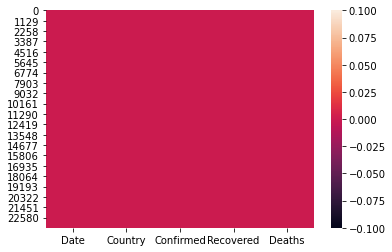

In [34]:
sb.heatmap(df.isnull())

No Missing Value found in Data

Correlation

In [35]:
dfcor=df.corr()
dfcor

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.069204,0.019298,0.064954
Confirmed,0.069204,1.000000,0.810991,0.929718
Recovered,0.019298,0.810991,1.000000,0.778094
Deaths,0.064954,0.929718,0.778094,1.000000


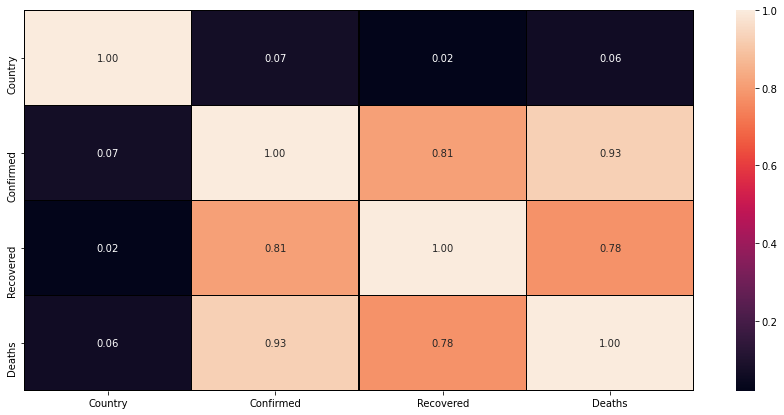

In [36]:
corr=df.corr()
plt.figure(figsize=(15,7))
sb.heatmap(corr,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.show()

My Observation:
    Death is the target variable,
    Strong Correction with Confirmed Cases,
    Week Correction with countries.

In [37]:
df.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


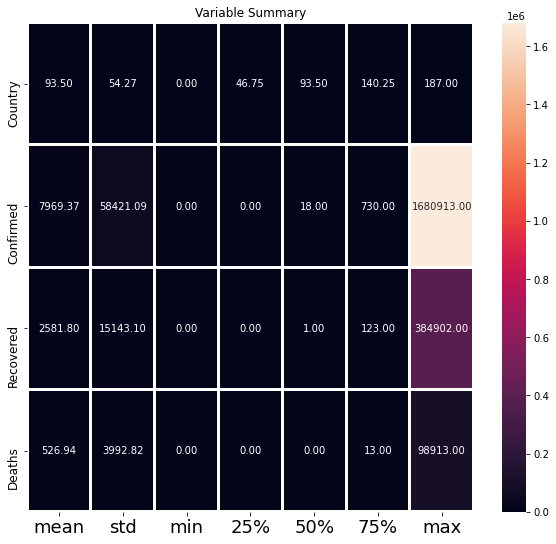

In [40]:
plt.figure(figsize=(10,9))
sb.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

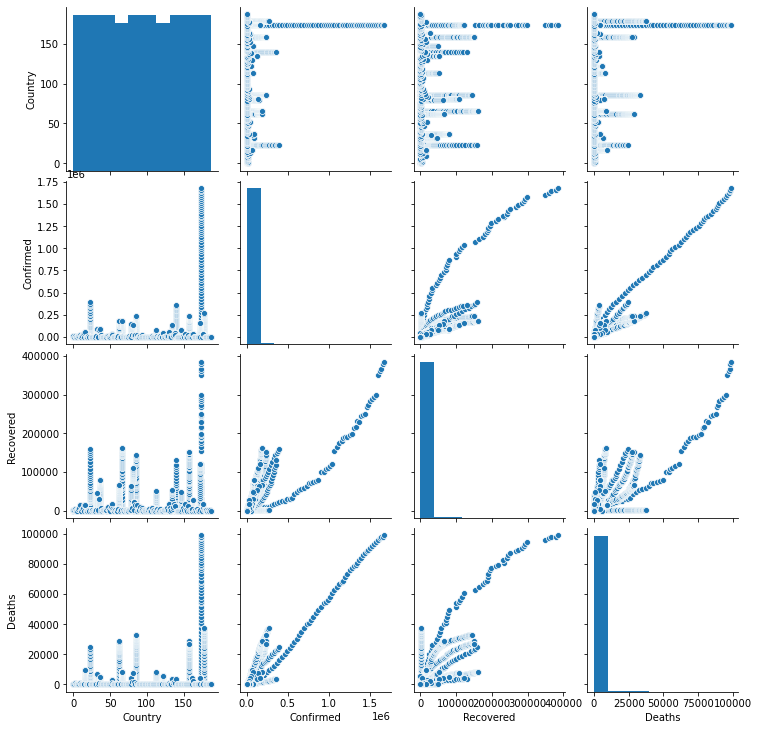

In [45]:
sb.pairplot(df)

Counties encoded above 150 are having high death rate.
Confirmed cases are having correlation with Death Rate.

Skewness

In [46]:
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

Univariant Analysis

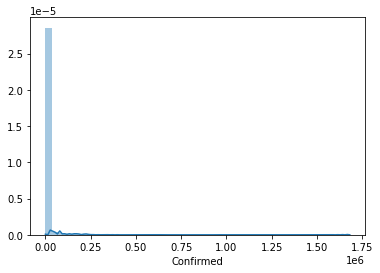

In [47]:
sb.distplot(df["Confirmed"])

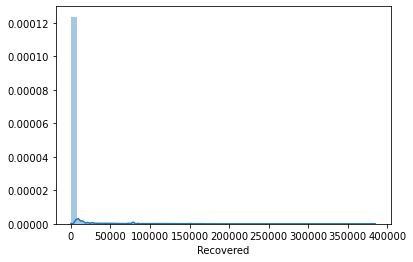

In [48]:
sb.distplot(df["Recovered"])

Bi Variant Analysis

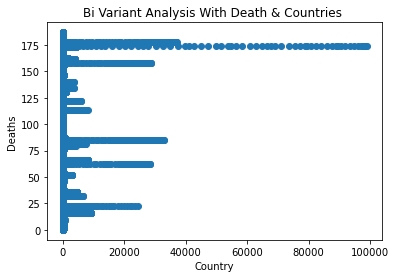

In [50]:
plt.scatter(df["Deaths"],df['Country'])
plt.title("Bi Variant Analysis With Death & Countries ")
plt.ylabel('Deaths')
plt.xlabel('Country')
plt.show()



Countires in range between 0 - 25, 50 - 75, 75 - 100, 150 - 175 above are having high death rate when compare with other ranage countries 

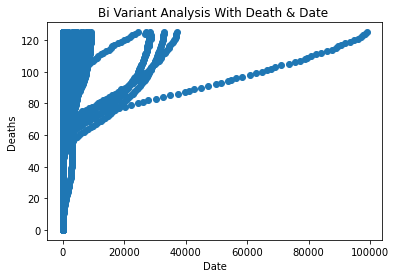

In [63]:
plt.scatter(df["Deaths"],df['Date'])
plt.title("Bi Variant Analysis With Death & Date ")
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.show()

Death Rate has been increased in Data Range from 60 - 120 Significantly.

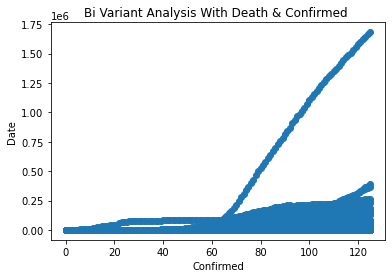

In [70]:
plt.scatter(df["Date"],df['Confirmed'])
plt.title("Bi Variant Analysis With Date & Confirmed ")
plt.ylabel('Date')
plt.xlabel('Confirmed')
plt.show()

There is a Significant Increase in Confirm Cases along with Day to Day Passing

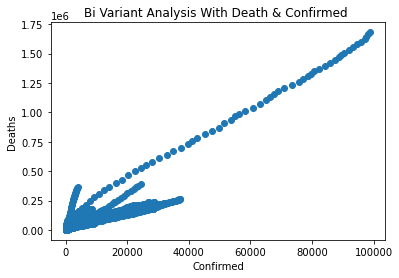

In [51]:
plt.scatter(df["Deaths"],df['Confirmed'])
plt.title("Bi Variant Analysis With Death & Confirmed ")
plt.ylabel('Deaths')
plt.xlabel('Confirmed')
plt.show()


Increase in confirm cases has storng relation with Death rate

Removing Outliers

In [56]:
df_new=df.drop(['Date'],axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_new))
z.shape

(23688, 4)

In [57]:
thresold =3 
print (np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [79]:
df_news=df[(z<3).all(axis=1)]
print(df.shape)
print (df_news.shape)

(23688, 5)
(23177, 5)


In [80]:
loss_percentage=(8523-8338)/8523*100
print ('Loss % =',loss_percentage)

Loss % = 2.170597207556025


In [66]:
df_news

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,100,0,0,0
3,0,111,0,0,0
4,0,122,0,0,0
...,...,...,...,...,...
23683,125,94,429,365,3
23684,125,95,9,6,1
23685,125,96,249,10,49
23686,125,97,920,336,7


In [82]:
y=df_news.iloc[:,-1]
x=df_news.iloc[:,0:-1]

In [78]:
df_news.shape

(23177, 5)

Transforming Data To Remove Skewness

In [83]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.09162202, -2.10872693, -1.11523507, -0.92085422],
       [-2.09162202, -2.04950776, -1.11523507, -0.92085422],
       [-2.09162202,  0.22101172, -1.11523507, -0.92085422],
       ...,
       [ 1.56693468,  0.15305179,  0.72632509,  0.37203629],
       [ 1.56693468,  0.17011838,  1.03027292,  1.28617797],
       [ 1.56693468,  0.18713345,  0.32944011,  0.67855172]])

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-2.09162202, -2.10872693, -1.11523507, -0.92085422],
       [-2.09162202, -2.04950776, -1.11523507, -0.92085422],
       [-2.09162202,  0.22101172, -1.11523507, -0.92085422],
       ...,
       [ 1.56693468,  0.15305179,  0.72632509,  0.37203629],
       [ 1.56693468,  0.17011838,  1.03027292,  1.28617797],
       [ 1.56693468,  0.18713345,  0.32944011,  0.67855172]])

We Will Use Linear Regression as the Increasing in Confirmed Cases keeps on Influencing the Death Rate

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

max_scr=0
for i in range(0,25000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        
        

At Random State 204 . The Model Is Performing Very Well
At Random State:- 204
At Random State 246 . The Model Is Performing Very Well
At Random State:- 246
At Random State 526 . The Model Is Performing Very Well
At Random State:- 526
At Random State 559 . The Model Is Performing Very Well
At Random State:- 559
At Random State 620 . The Model Is Performing Very Well
At Random State:- 620
At Random State 630 . The Model Is Performing Very Well
At Random State:- 630
At Random State 779 . The Model Is Performing Very Well
At Random State:- 779
At Random State 816 . The Model Is Performing Very Well
At Random State:- 816
At Random State 819 . The Model Is Performing Very Well
At Random State:- 819
At Random State 824 . The Model Is Performing Very Well
At Random State:- 824
At Random State 843 . The Model Is Performing Very Well
At Random State:- 843
At Random State 871 . The Model Is Performing Very Well
At Random State:- 871
At Random State 1183 . The Model Is Performing Very Well
At Rand

KeyboardInterrupt: 

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=10689) #Random state = 10689

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Regularisation

In [91]:
#Lasso Regression
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [92]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- -932.3109234735919
R2_score is :- 10.52726753906612


At CV :- 3
Cross Validation Score is :- -64.713723682876
R2_score is :- 10.52726753906612


At CV :- 4
Cross Validation Score is :- -43.283889966234355
R2_score is :- 10.52726753906612


At CV :- 5
Cross Validation Score is :- -52.13635933835326
R2_score is :- 10.52726753906612


At CV :- 6
Cross Validation Score is :- -86.61869760454279
R2_score is :- 10.52726753906612


At CV :- 7
Cross Validation Score is :- -147.991410725724
R2_score is :- 10.52726753906612


At CV :- 8
Cross Validation Score is :- -188.20254923629813
R2_score is :- 10.52726753906612


At CV :- 9
Cross Validation Score is :- -326.21246514430743
R2_score is :- 10.52726753906612




In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 225.2555773560565
Mean Square Error: 359159.7143186214
Root Mean Sqaured Error: 599.2993528434862


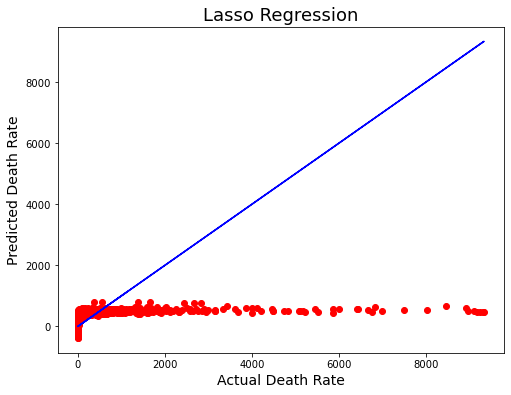

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Death Rate',fontsize=14)
plt.ylabel('Predicted Death Rate',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Data Point are far from the Predicted Line

In [96]:
#Ensemblier Technique
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [97]:
dt=DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: 95.88139704180779
Cross Val Score: 13.231854543808355


In [98]:
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 225.2555773560565
Mean Square Error: 359159.7143186214
Root Mean Sqaured Error: 599.2993528434862


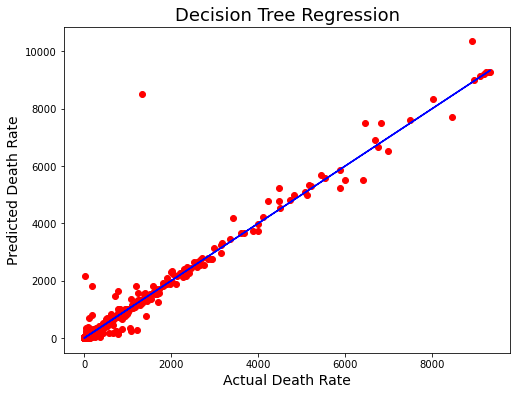

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Death Rate',fontsize=14)
plt.ylabel('Predicted Death Rate',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Data Points are in Line with Predicted Lines

In [ ]:
rf=RandomForestRegressor(criterion='friedman_mse', splitter='random')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Death Rate',fontsize=14)
plt.ylabel('Predicted Death Rate',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

In [ ]:
gbr=GradientBoostingRegressor(criterion='mse', loss='ls',n_estimators=50)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_decision)
print("r2_score:",gbrs*100)
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',gbrc*100)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Death Rate',fontsize=14)
plt.ylabel('Predicted Death Rate',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

In [ ]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
sv=SVR(kernel='linear',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_decision)
print("r2_score:",svs*100)
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',svc*100)


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Death Rate',fontsize=14)
plt.ylabel('Predicted Death Rate',fontsize=14)
plt.title('Support Vector Regressior',fontsize=18)
plt.show()

In [104]:
import pickle
filename='Project_18.pkl'
pickle.dump(ls,open(filename,'wb'))